# This is an attempt to understand and possibly predict the numbers of the "Quina" which is a Brazilian Loto.

The data was extracted from:
https://asloterias.com.br/download-todos-resultados-quina

The period of the results is since its creation, which corresponds from 1992 until this date.

### First of all, the data will be analyzed in order to spot any type of pattern

#### Reading the file

In [1]:
import pandas as pd

data_raw = pd.read_excel('quina_asloterias_ate_concurso_4998_sorteio.xlsx')

In [2]:
data_raw.head()

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5
0,4998,11/06/2019,29,40,21,10,12
1,4997,10/06/2019,43,75,57,30,10
2,4996,08/06/2019,35,54,52,3,75
3,4995,07/06/2019,67,32,6,43,49
4,4994,06/06/2019,73,3,44,57,36


#### Calculation statistical parameters

In [3]:
# Droping "Concurso" and "Data" features
data = data_raw.drop(columns = ['Concurso', 'Data'])

# Extracting the data size
size = len(data)
print("The Data size is: {}".format(size))

# Verifying ouliers
print("\nMaximum values")
print(data.max())
print("\nMinimum values")
print(data.min())

# Calculating statistical parameters
print("\n Std")
print(data.std())
print("\n Mean")
print(data.mean())
print("\n Median")
print(data.median())

The Data size is: 4998

Maximum values
bola 1    80
bola 2    80
bola 3    80
bola 4    80
bola 5    80
dtype: int64

Minimum values
bola 1    1
bola 2    1
bola 3    1
bola 4    1
bola 5    1
dtype: int64

 Std
bola 1    23.487956
bola 2    22.954236
bola 3    22.724255
bola 4    22.634103
bola 5    23.377774
dtype: float64

 Mean
bola 1    38.331333
bola 2    39.372349
bola 3    41.021208
bola 4    41.309524
bola 5    42.336535
dtype: float64

 Median
bola 1    38.0
bola 2    39.0
bola 3    41.0
bola 4    42.0
bola 5    43.0
dtype: float64


#### Ploting data histograms

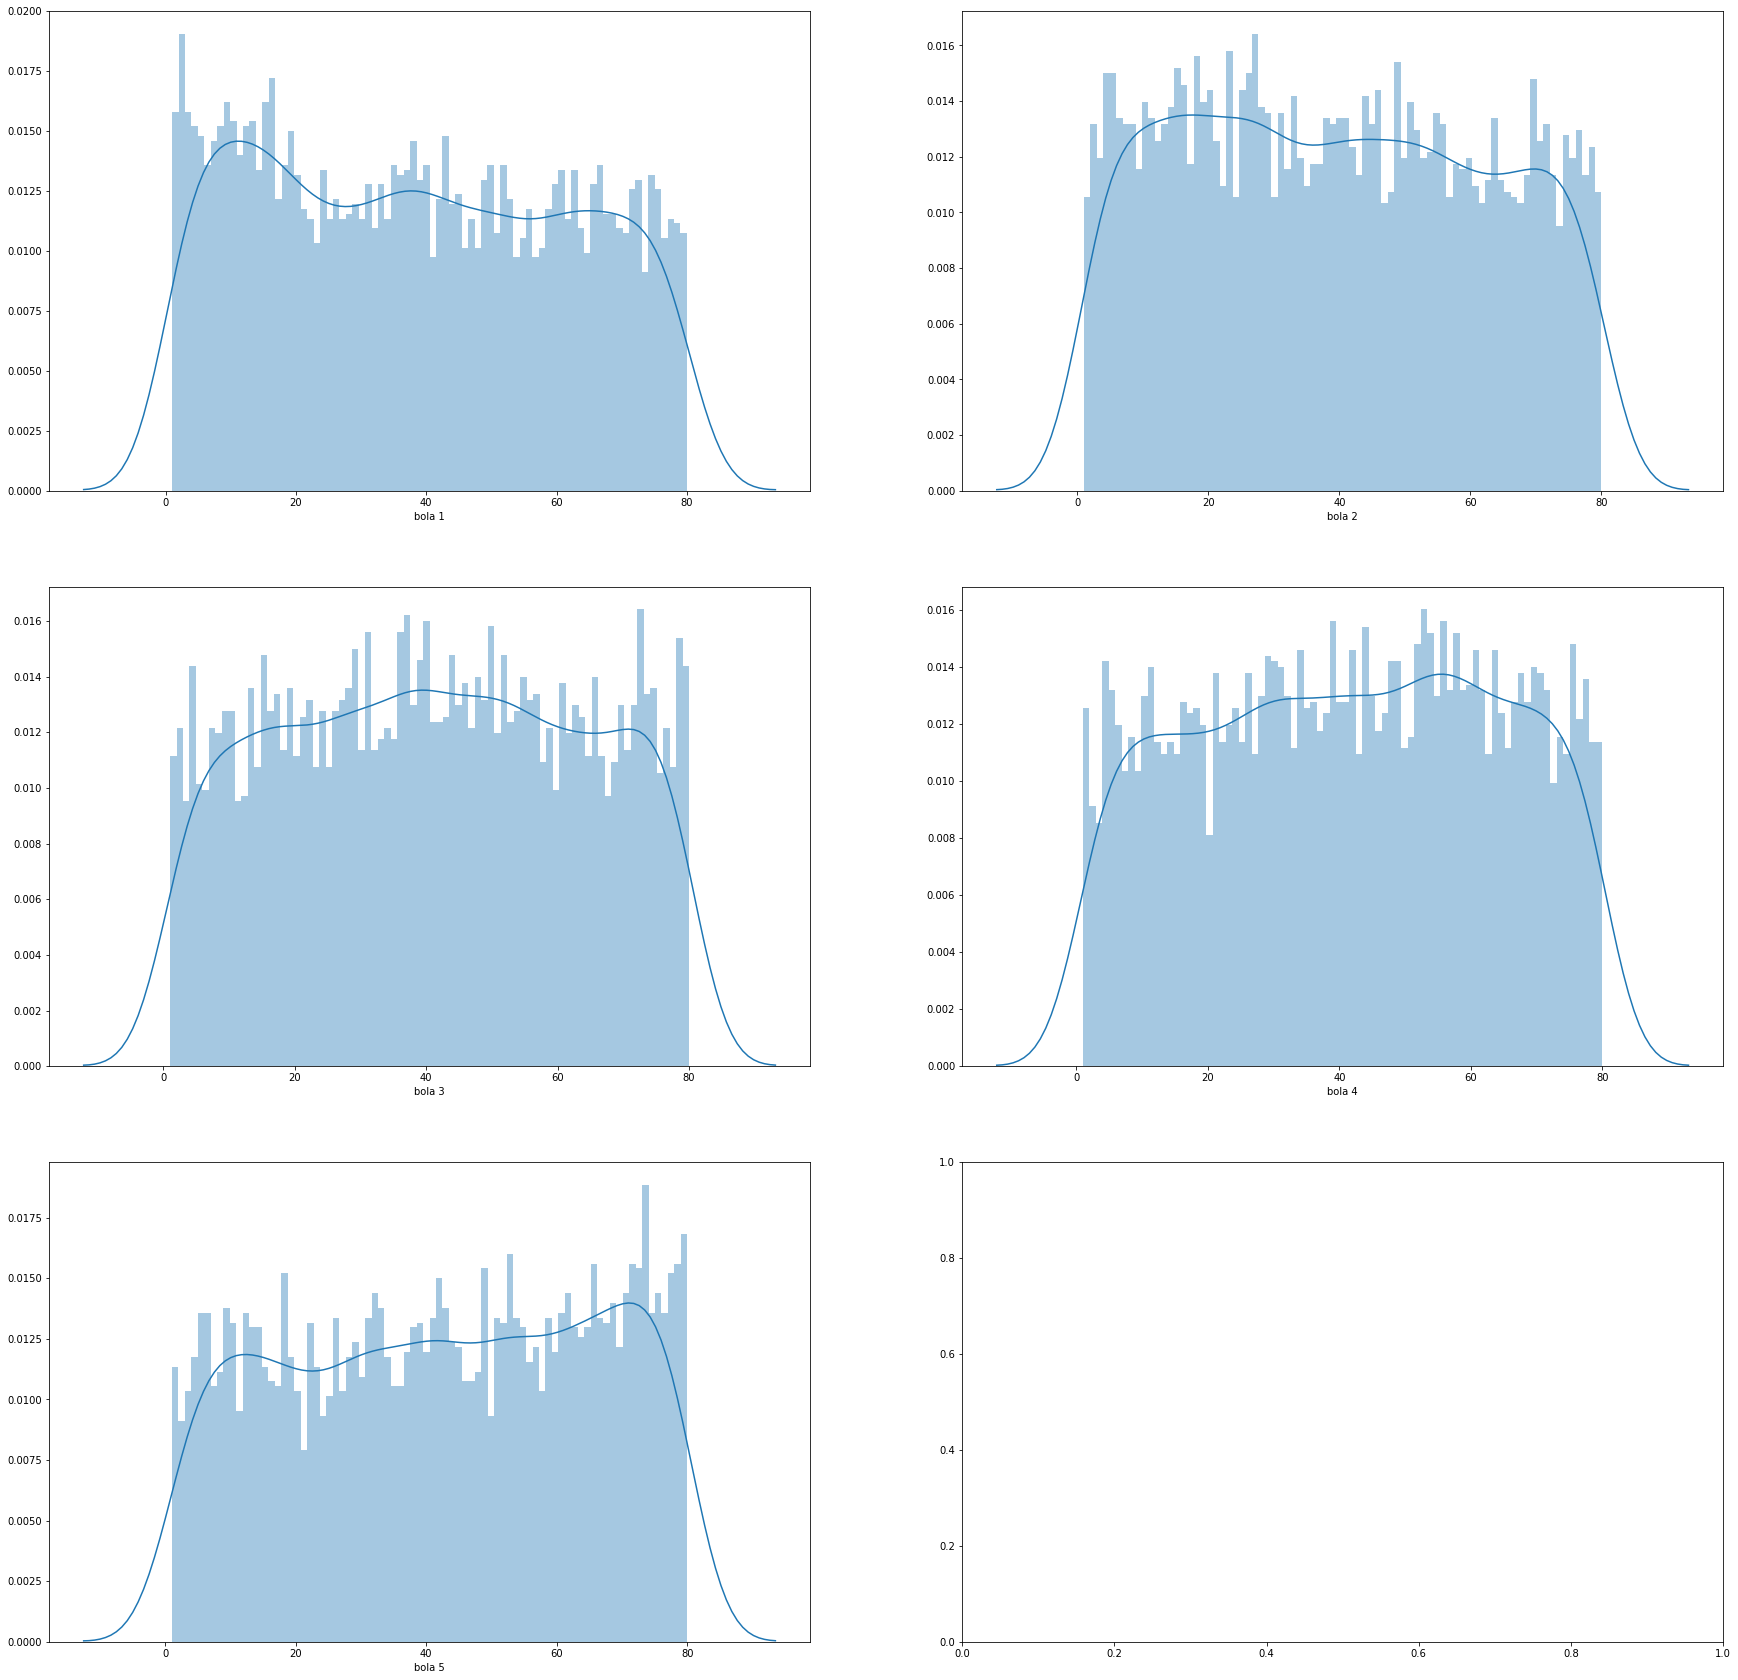

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

f, axes = plt.subplots(3, 2, figsize = (30, 30))
# ax.tick_params(direction='out', length=6, width=5, colors='r',
#                grid_color='r', grid_alpha=0.5)

for ax, feature in zip(axes.flat, data.columns):
    sns.distplot(data[feature], bins = 80, ax = ax)


#### Probability of each number to appear

<StemContainer object of 3 artists>

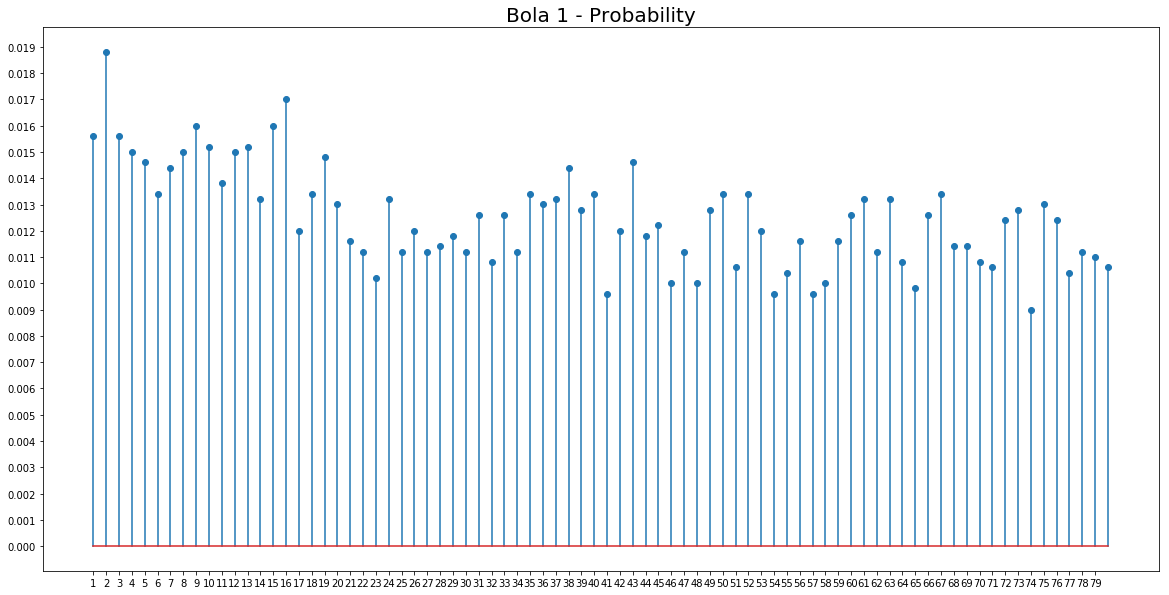

In [18]:
import numpy as np

plt.figure(figsize = (20,10))
plt.xticks(range(1, 80))
plt.yticks(np.arange(0, 2, step = 0.001))
plt.title("Bola 1 - Probability", fontsize = 20)
prob = data['bola 1'].value_counts(normalize = True, sort = True)
plt.stem(prob.index, prob.values)

<StemContainer object of 3 artists>

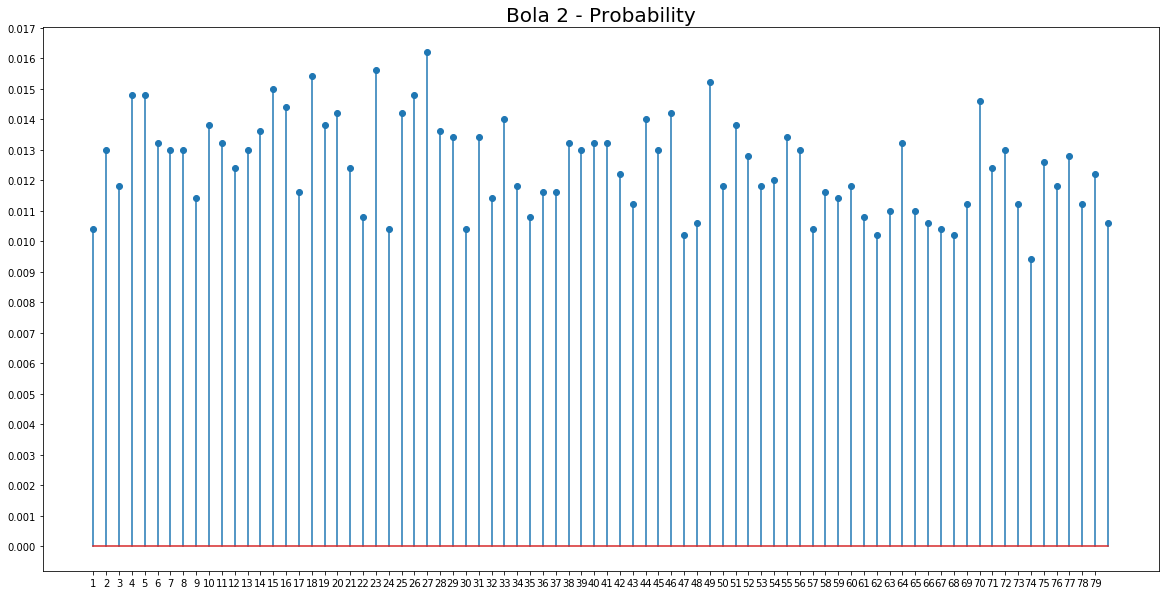

In [17]:
plt.figure(figsize = (20,10))
plt.xticks(range(1, 80))
plt.yticks(np.arange(0, 2, step = 0.001))
plt.title("Bola 2 - Probability", fontsize=20)
prob = data['bola 2'].value_counts(normalize = True, sort = True)
plt.stem(prob.index, prob.values)

<StemContainer object of 3 artists>

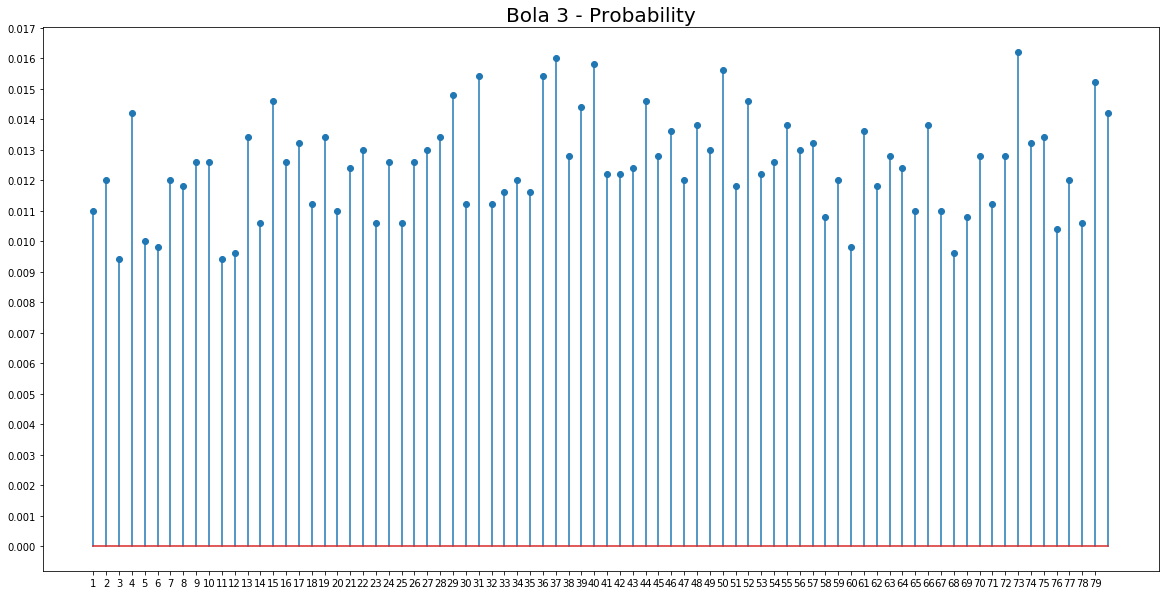

In [19]:
plt.figure(figsize = (20,10))
plt.xticks(range(1, 80))
plt.yticks(np.arange(0, 2, step = 0.001))
plt.title("Bola 3 - Probability", fontsize=20)
prob = data['bola 3'].value_counts(normalize = True, sort = True)
plt.stem(prob.index, prob.values)

<StemContainer object of 3 artists>

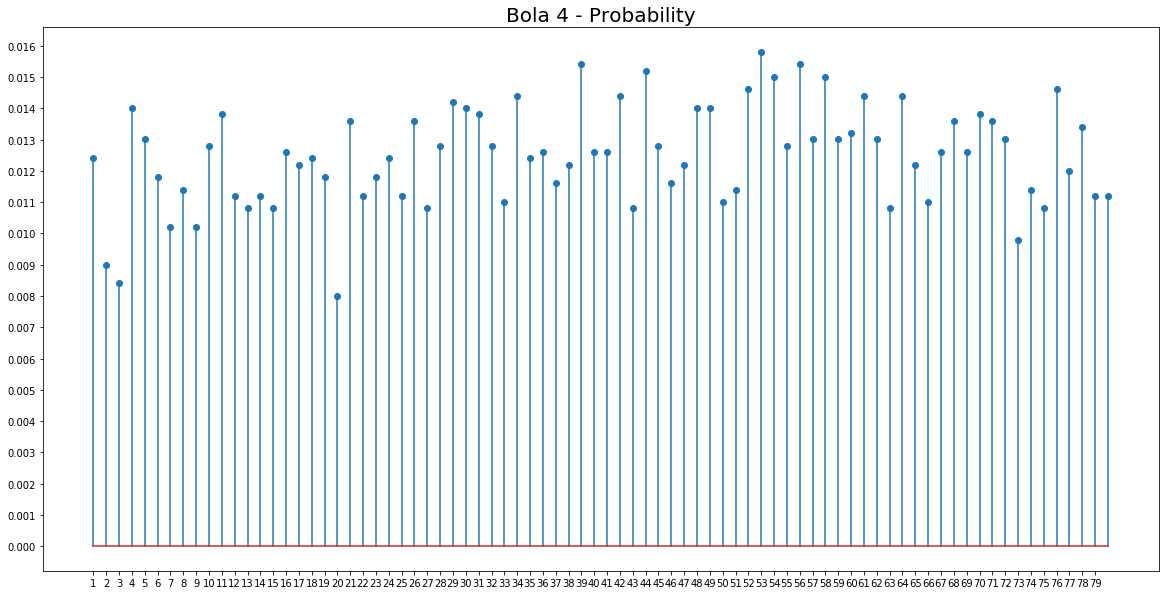

In [20]:
plt.figure(figsize = (20,10))
plt.xticks(range(1, 80))
plt.yticks(np.arange(0, 2, step = 0.001))
plt.title("Bola 4 - Probability", fontsize=20)
prob = data['bola 4'].value_counts(normalize = True, sort = True)
plt.stem(prob.index, prob.values)

<StemContainer object of 3 artists>

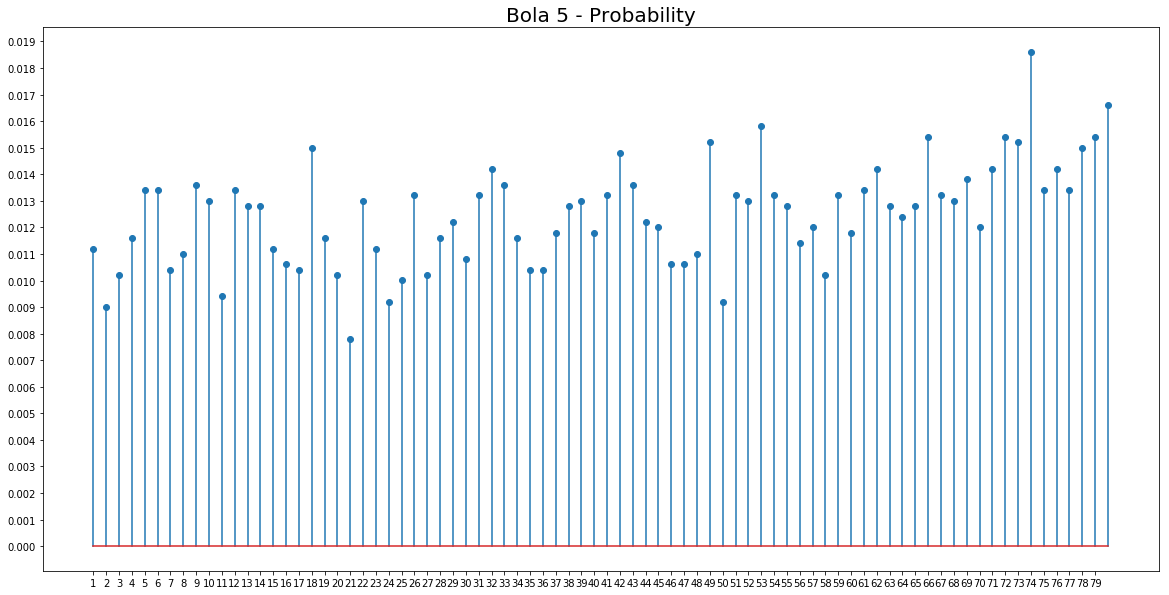

In [21]:
plt.figure(figsize = (20,10))
plt.xticks(range(1, 80))
plt.yticks(np.arange(0, 2, step = 0.001))
plt.title("Bola 5 - Probability", fontsize=20)
prob = data['bola 5'].value_counts(normalize = True, sort = True)
plt.stem(prob.index, prob.values)

In [50]:
from sklearn.cluster import DBSCAN

epsilon = 2
min_samples = 2

db = DBSCAN(eps = epsilon, min_samples = min_samples)

db.fit(data)
np.min(db.labels_)


-1

In [51]:
from sklearn import metrics
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data, labels))



Estimated number of clusters: 1
Estimated number of noise points: 4996
Silhouette Coefficient: -0.035


/home/yuri/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


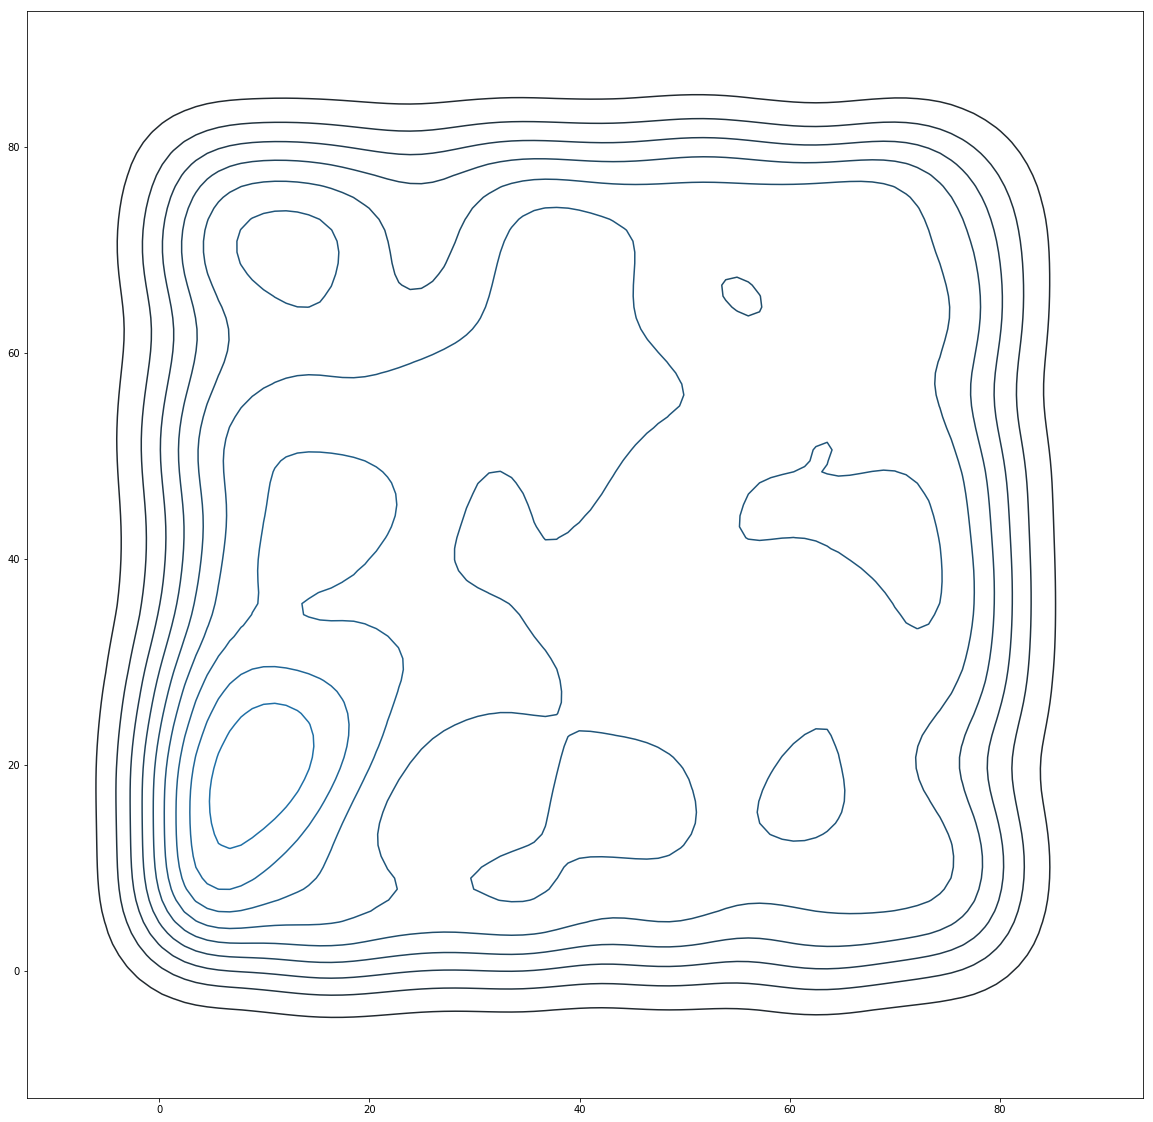

In [61]:
plt.figure(figsize=(20,20))
sns.kdeplot(data = data)